In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install --upgrade setuptools


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Import support libraries for plotting
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


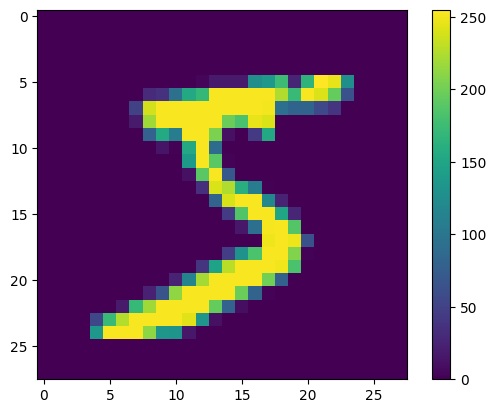

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
print(y_train[0])

5


In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


z:\30__Sandbox_Learning\Grokking-DL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [8]:
history = model.fit(x_train, y_train, epochs=20, batch_size=15)

Epoch 1/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7050 - loss: 2.0703
Epoch 2/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9305 - loss: 0.2673
Epoch 3/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9534 - loss: 0.1665
Epoch 4/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9617 - loss: 0.1385
Epoch 5/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9680 - loss: 0.1132
Epoch 6/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9745 - loss: 0.0948
Epoch 7/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9767 - loss: 0.0851
Epoch 8/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9789 - loss: 0.0801
Epoch 9/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9817 - loss: 0.0676
Epoch 10/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9830 - loss: 0.0634
Epoch 11/20
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9843 - loss: 0.0591
Epoch 12/20
4000/4000 ━━━━━━━━

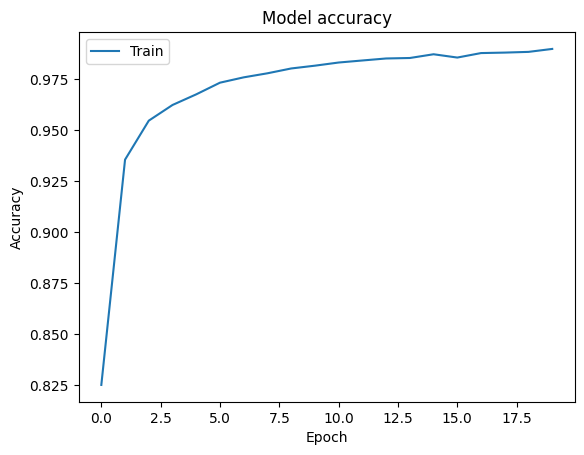

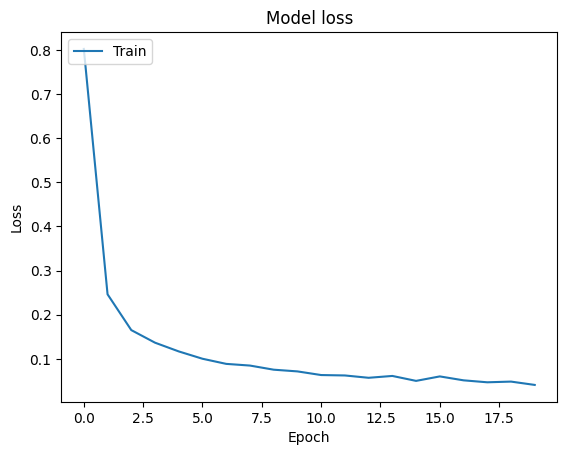

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Test accuracy: 0.9718000292778015
Test loss: 0.1718001812696457


In [11]:
print(x_test[0])
print(y_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19